# **CS699 Final Project**

*Cody Thayer*  |  *6.20.2023*

To best visualize this python notebook, upload notebook to google colab, or use the following link:

https://colab.research.google.com/drive/1tQ-wMfn7hGRHrPTdgnlcIwx2rbwElqxe?usp=sharing

###**Table of Contents**

**Libraries**
- All relevant library that need to be loaded.

**Best Model Code**
- Separated out the code needed to run the best model of the 30 total created in the project.
- Specific instructions on how to execute this code are in that section

**Full Project Code**
- All the code used for the entirety of the final project with more extensive notes.

**Functions**
- All functions I built to help with different aspects of the project


## **Libraries**

In [141]:
# Data Wrangling
import pandas as pd
import numpy as np
import random
import io
from google.colab import files
from pandas.core.api import NA
import statistics as stats

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.preprocessing import StandardScaler


# Model Building
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, matthews_corrcoef, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_curve, PrecisionRecallDisplay, precision_recall_curve
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers


# Graphing
from plotnine import * # ggplot2
import seaborn as sns
import matplotlib.pyplot as plt

## **Best Model Code**

### ***Code Guide***


1. Load all libraries in the **Libraries** section of notebook.
2. **Import Data**. Files you will need:
  - ***'project-2018-BRFSS-arthritis.csv'*** the data file for the finla project.
  - ***'f3_info_for_pca.csv'*** feature info for processing the data and building the Feature Set 5 used for the best model output. This file was submitted with my assignment.
  - You can upload these files to google colab notebook using the "Upload File" function below in the Import Data section.
3. **Preprocessing & Feature Selection**
  - Various preprocessing of the data.
  - Feature Set 5 is created using PCA (the best attribute selection method found)
  - Final processed and attribute selected data is split into training and testing.
4. **Build Model**
  - The best model of the project is built. You will need to find the ideal k for the KNN model. A accuracy vs. k graph is output, look for an elbow point, and input this value into the KNN model as a parameter. I believe the preset k value will be find, but if not, adjust.
  - Evaluation of the model.

### ***Import Data***

In [142]:
# Upload Files
uploaded = files.upload()

Saving project-2018-BRFSS-arthritis.csv to project-2018-BRFSS-arthritis (1).csv
Saving f3_info_for_pca.csv to f3_info_for_pca (1).csv
Saving f3_info.csv to f3_info (1).csv


In [ ]:
# import raw survey data
raw_data = pd.read_csv(io.BytesIO(uploaded['project-2018-BRFSS-arthritis.csv'])); raw_data

In [144]:
# import Feature Set 3 Info
## Will be using this for PCA for Feature Set 5
feature_info_path = 'f3_info_for_pca.csv'
feature_info = pd.read_csv(io.BytesIO(uploaded[feature_info_path]), dtype='str'); feature_info
features_id = "F3"

### ***Preprocessing & Feature Selection***

**Various Preprocessing Steps**

In [145]:
# Change names of columns using  dictionary
rename_dict = {feature_info['feature_name'][row]:feature_info['rename'][row] for row in range(0, len(feature_info))}; rename_dict
# rename columns
df_raw1 = raw_data.rename(columns=rename_dict)

In [ ]:
# Place feature info into dictionary
feature_dict = {feature_info['rename'][row]:{feature_info['null'][row]: feature_info['null_replacement'][row],
                                     feature_info['val1'][row]: feature_info['val1_replacement'][row],
                                     feature_info['val2'][row]: feature_info['val2_replacement'][row],
                                     feature_info['val3'][row]: feature_info['val3_replacement'][row]}
 for row in range(0, len(feature_info))}; feature_dict

In [ ]:
# Feature Selection
# Subset our raw data
#Create Feature Set 3 df which will be used for Feature Set 5 Creatation
df = df_raw1[list(feature_info['rename'])]; df

In [ ]:
# Preprocessing
# Replace values based on dictionary info and Type adjustments
df = df.astype('str'); df.dtypes
df = df.replace(feature_dict); df
df.dtypes

In [ ]:
# Preproccessing Replace Function

def stat_replace(df):
  for col in df:
    if df[col].str.contains(('median')).any():
      median_col = df[col].dropna()[~df[col].isin(['median', 'nan'])].astype(float)
      median = round(stats.median(median_col))
      df[col] = df[col].replace(['median', 'nan'], median)
    elif df[col].str.contains('mean').any():
      mean_col = df[col].dropna()[~df[col].isin(['mean', 'nan'])].astype(float)
      mean = round(stats.mean(mean_col))
      df[col] = df[col].replace(['mean', 'nan'], mean)
    elif df[col].str.contains('mode').any():
      mode_col = df[col].dropna()[~df[col].isin(['mode', 'nan'])].astype(float)
      mode = round(stats.mode(mode_col))
      df[col] = df[col].replace(['mode', 'nan'], mode)


stat_replace(df); df
df_f = df.astype('str'); df_f.dtypes
df_values(df_f)

# # Check out replacements
# for col in df_f:
#   print(df_f[col].unique())

In [ ]:
# Normalize Data (0-1)
# convert to np array to scale
min_max_scaler = preprocessing.MinMaxScaler()
df_scale = min_max_scaler.fit_transform(df_f); df_scale
df_scale = pd.DataFrame(df_scale, columns=df.columns); df_scale

df_scale

**Feature Selection:** Create Feature Set 5 using PCA

In [ ]:
# Create Feature Set 5 using PCA
features_id = "F5"

# SVM
# Dimensional Reduction
# https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_scale.values)

pca_result
df_pca = pd.DataFrame(pca_result); df_pca

In [ ]:
# Visualize Principal Components
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")



fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')
ax.text(-0.5, 0, 0.12, "Principle Components 1:3")

ax.scatter(pca_result[:,0], pca_result[:,1], marker='.')
ax.scatter(pca_result[:,1], pca_result[:,2], marker='.')
ax.scatter(pca_result[:,2], pca_result[:,3], marker='.')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

**Creating Final Training and Testing Data**

In [ ]:
# Declare Feature Vector and Target Vectors
X = df_pca
y = df_scale['havarth']

# Check Feature and Target Vectors
X.columns, y.name
X, y

In [154]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.34, random_state = 42)

### ***Build Model***

In [ ]:
model_name = "KNN"

# Finding ideal k for KKN model
k_values = [i for i in range (1,31)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5) # doesn't test on the same train/test split each time, thats why you use X and y.
    scores.append(np.mean(score))
# cv = Determines the cross-validation splitting strategy.



sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [156]:
# Build Model
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [157]:
# predictions
y_pred_knn = knn.predict(X_test); y_pred_knn
# probabilities
y_prob_knn = knn.predict_proba(X_test); y_prob_knn

array([[1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ]])

In [158]:
# Evaluation Function

def eval_model(y_pred, y_test=y_test, model_name=model_name, features_id=features_id):

  identifier =  model_name + ": " + features_id; identifier

  cm = confusion_matrix(y_test, y_pred)

  # Confusion Matrix
  tn, fp, fn, tp = cm.ravel()
  tn, fp, fn, tp

  # TP rate
  # class = 1, positive
  tpr = tp/(tp+fn); tpr
  # class = 0, negative
  tnr = tn/(tn+fp)
  # weighted
  total = (tp+fp+tn+fp); total
  N = tn + fn
  P = tp + fp
  tpr_weighted = tnr*(N/total) + tpr*(P/total); tpr_weighted

  # FP rate
  # class = 1, positive
  fpr = fp/(fp+tn); fpr
  # class = 0, negative
  fnr = fn/(fn+tp); fnr
  # weighted
  fpr_weighted = fpr*(P/total) + fnr*(N/total); fpr_weighted

  # precision
  # gives precision in form [0 Class, 1 Class (pos_label)]
  precision = metrics.precision_score(y_test, y_pred, pos_label=1, average=None); precision
  # weighted average over both classes
  precision_weight = metrics.precision_score(y_test, y_pred, pos_label=1, average='weighted')

  # recall
  recall = metrics.recall_score(y_test, y_pred, pos_label=1, average=None)
  recall_weight = metrics.recall_score(y_test, y_pred, pos_label=1, average='weighted')

  # F-measure
  f1 = metrics.f1_score(y_test, y_pred, pos_label=1, average=None); f1
  f1_weight = metrics.f1_score(y_test, y_pred, pos_label=1, average='weighted')

  # ROC area
  # SHOULD THIS CHANGE? Don't think so since its a metric for both classes.
  roc_area = metrics.roc_auc_score(y_test, y_pred, average=None); roc_area
  roc_area_weight = metrics.roc_auc_score(y_test, y_pred, average='weighted'); roc_area_weight

  # MCC
  # Don't believe you can do a weighted average of this.
  mcc = matthews_corrcoef(y_test, y_pred)

  # Weighted average (over all classes) of each of the above performance measures.
  # PRC (imbalanced data set).
  precision_recall_curve(y_test, y_pred)

  eval_dict = {"1": {'Model Name': identifier, 'Class': 0,
                    'TPR':	round(tnr, 3), 'FPR':	round(fnr, 3),
                    'Precision':	round(precision[0], 3), 'Recall':	round(recall[0], 3),
                    'F1':	round(f1[0], 3), 'ROC Area':	round(roc_area, 3),
                    'MCC': round(mcc, 3)},
              "2": {'Model Name': identifier, 'Class': 1,
                    'TPR':	round(tpr, 3), 'FPR':	round(fpr, 3),
                    'Precision':	round(precision[1], 3), 'Recall':	round(recall[1], 3),
                    'F1':	round(f1[1], 3), 'ROC Area':	round(roc_area, 3),
                    'MCC': round(mcc, 3)},
              "3": {'Model Name': identifier, 'Class': 'weighted',
                    'TPR':	round(tpr_weighted, 3), 'FPR':	round(fpr_weighted, 3),
                    'Precision':	round(precision_weight, 3), 'Recall':	round(recall_weight, 3),
                    'F1':	round(f1_weight, 3), 'ROC Area':	round(roc_area, 3),
                    'MCC': round(mcc, 3)}
  }

  df_eval = pd.DataFrame(eval_dict).transpose()

  # Build cm graph
  disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='bone', colorbar=False)

  return df_eval

KNN Model Accuracy: 0.9677180877279448


,Model Name,Class,TPR,FPR,Precision,Recall,F1,ROC Area,MCC
1,KNN: F5,0,0.954,0.025,0.95,0.954,0.952,0.964,0.927
2,KNN: F5,1,0.975,0.046,0.977,0.975,0.976,0.964,0.927
3,KNN: F5,weighted,0.969,0.039,0.968,0.968,0.968,0.964,0.927


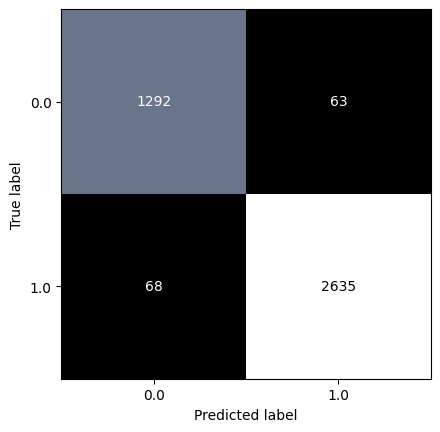

In [159]:
# evaluate Model
accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Model Accuracy:", accuracy)

eval_model(y_pred=y_pred_knn, model_name=model_name, features_id=features_id)

In [160]:
# Graph ROC and PRC Function

def model_curves(y_probs, y_test=y_test, model_type="NA"):

  if model_type == "NN":
    # get positive class probabilities
    pos_probs = y_probs
  else:
    pos_probs = pd.DataFrame(y_probs)[1]

  # ROC
  fpr, tpr, _ = roc_curve(y_test, pos_probs, pos_label=1)
  roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr) #.plot()

  # PRC
  prec, recall, _ = precision_recall_curve(y_test, pos_probs, pos_label=1)
  pr_display = PrecisionRecallDisplay(precision=prec, recall=recall) # .plot()

  # Plot
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

  roc_display.plot(ax=ax1)
  pr_display.plot(ax=ax2)
  plt.show()

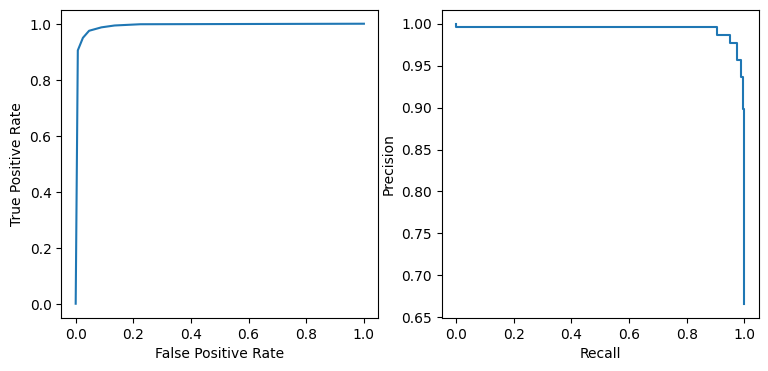

In [161]:
model_curves(y_probs=y_prob_knn)

## **Full Project Code**

### **Import Data**

#### ***Upload Files***

In [ ]:
# Upload Files
uploaded = files.upload()

#### ***Raw CDC Data***

In [ ]:
raw_data = pd.read_csv(io.BytesIO(uploaded['project-2018-BRFSS-arthritis.csv'])); raw_data

In [ ]:
# Explore data
raw_data.columns
raw_data.shape
for col in raw_data.columns:
    print(raw_data[col].value_counts())

#### ***Feature Info***

In [ ]:
# read feature info

# # Feature Set 1
# feature_info_path = 'f1_info.csv'
# feature_info = pd.read_csv(io.BytesIO(uploaded[feature_info_path]), dtype='str'); feature_info
# features_id = "F1"

# # Feature Set 2
# feature_info_path = 'f2_info.csv'
# feature_info = pd.read_csv(io.BytesIO(uploaded[feature_info_path]), dtype='str'); feature_info
# features_id = "F2"

# Feature Set 3
# feature_info_path = 'f3_info.csv'
feature_info_path = 'f3_info_for_pca.csv'

feature_info = pd.read_csv(io.BytesIO(uploaded[feature_info_path]), dtype='str'); feature_info
features_id = "F3"

# # Feature Set 4
# ## subset of Feature Set 3
# top_10_gini_features = ['design_weight', 'bmi', 'employ', 'age', 'state', 'phys_health',
#                         'gen_health', 'sleep', 'income', 'mental_health', 'havarth']
# features_id = "F4"

In [ ]:
# Change names of columns
# create dictionary
rename_dict = {feature_info['feature_name'][row]:feature_info['rename'][row] for row in range(0, len(feature_info))}; rename_dict
# rename columns
df_raw1 = raw_data.rename(columns=rename_dict)

### **Preprocessing & Feature Selection**

In [ ]:
# Load value replacement info
# ALWAYS TYPE ISSUES!
# starting will all strings, since using "median", "mode", "mean"
# was a bad idea looking back. should have a numerical code for each of the replacement types.

# Place into dictionary
feature_dict = {feature_info['rename'][row]:{feature_info['null'][row]: feature_info['null_replacement'][row],
                                     feature_info['val1'][row]: feature_info['val1_replacement'][row],
                                     feature_info['val2'][row]: feature_info['val2_replacement'][row],
                                     feature_info['val3'][row]: feature_info['val3_replacement'][row]}
 for row in range(0, len(feature_info))}; feature_dict

In [ ]:
# find and replace using the dictionary and adjust TYPE

# Starting DataFrame for each (1-5) Feature Sets

# Feature 1 and Feature 2 df
df = df_raw1[list(feature_info['rename'])]; df

## Feature 3 df
# df = df_combo4

# # Feature 4 df
# df = df_raw1[top_10_gini_features]; df

df = df.astype('str'); df.dtypes
df = df.replace(feature_dict); df
df.dtypes


#### ***Feature Set 3 Correlation Analysis***

###### Correlation Analysis

In [ ]:
# Features Round 2
# DROP HAVARTH
cor_df = df_scale.drop('havarth', axis=1); cor_df

# Create correlation matrix
# abs() because we are only worried about finding strong correlation (not direction of correlation)
f2_cor = cor_df.corr(method='pearson').abs(); f2_cor

# Find highly correlated pairs
# get upper triangle of correlation matrix
upper = f2_cor.where(np.triu(np.ones(f2_cor.shape), k=1).astype(bool))

upper

# find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.40)]; to_drop

# drop highly correlated features from dataframe
# df_scale.drop(to_drop, axis=1, inplace=True)


# export cor matrix
# only 5 pairs with |correlation coefficience| > 0.40
# ['employ', 'phys_health', 'race', 'sex', 'weight']

# file_name = "cor_results.csv"
# with open(file_name, 'w') as f:
#     upper.to_csv(file_name)

['employ', 'phys_health', 'race', 'sex', 'weight']

###### Combining Features

In [ ]:
# Combining Features

df_combo = df_raw1[list(feature_info['rename'])]
df_combo


# Combine cancer cols
df_combo['cancer'] = np.where((df_combo['cancer1'] == 2) | (df_combo['cancer2'] == 2), 2, 1)
df_combo2 = df_combo.drop(['cancer1', 'cancer2'], axis=1)
df_combo2

# Check
df_combo.loc[78:80,]



# Combine physical difficulty cols
df_combo2['phy_diff'] = np.where(((df_combo2['phy_diff1'] == '2') | (df_combo2['phy_diff2'] == '2') | (df_combo2['phy_diff3'] == '2')), '2', '1')
df_combo2
df_combo3 = df_combo2.drop(['phy_diff1', 'phy_diff2', 'phy_diff3'], axis=1)
df_combo3

# Check
df_combo.loc[150:153,['phy_diff1', 'phy_diff2', 'phy_diff3']]
# 150 should be 2, 151 > 2, 152 > 1
df_combo3.loc[150:153,'phy_diff']
# issues with type, convert 2 to str.



# Combine physical difficulty cols
df_combo3['heart'] = np.where(((df_combo3['heart1'] == '2') | (df_combo3['heart2'] == '2') | (df_combo3['heart3'] == '2')), '2', '1')
df_combo3
df_combo4 = df_combo3.drop(['heart1', 'heart2', 'heart3'], axis=1)
df_combo4

# Check
df_combo.loc[160:170,['heart1', 'heart2', 'heart3']]
# 150 should be 2, 151 > 2, 152 > 2, 163 > 2, 169 > 1
df_combo4.loc[160:170,'heart']


# # Fill '?' with mode of the col.

# mode_cancer = stats.mode(df_combo4['cancer'])
# df_simple_find_replace(df_combo4, 'cancer', ['?'], mode_cancer)

# df_values(df.cancer)

# df
# # Final df
# df_combo4

# df_f[df_f['bmi']=='?']

#### ***Initially Processed Dataframe***

In [ ]:
# Find and Replace
stat_replace(df); df
df_f = df.astype('str'); df_f.dtypes # idk why the type change doesnt work in the function.
df_values(df_f)

In [ ]:
# Final df
df_f

# Looks very clean!
for col in df_f:
  print(df_f[col].unique())

#### ***Normalization***

In [ ]:
# converts to np array to scale
min_max_scaler = preprocessing.MinMaxScaler()
df_scale = min_max_scaler.fit_transform(df_f); df_scale
# convert back to df and rename columns
df_scale = pd.DataFrame(df_scale, columns=df.columns); df_scale
# df_scale = pd.DataFrame(df_scale, columns=rep_info['rename']); df_scale


# Check scaling
# df_f.head(10), df_x.head(10)

# Note: all 1s are now 0s. and 2s and now 1s.
df_scale

#### ***Feature Set 5 PCA***

In [ ]:
# PCA
features_id = "F5"

# SVM
# Dimensional Reduction
# https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_scale.values)

pca_result
df_pca = pd.DataFrame(pca_result)


plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")



fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')
ax.text(-0.5, 0, 0.12, "Principle Components 1:3")

ax.scatter(pca_result[:,0], pca_result[:,1], marker='.')
ax.scatter(pca_result[:,1], pca_result[:,2], marker='.')
ax.scatter(pca_result[:,2], pca_result[:,3], marker='.')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

#### ***Split Data***

In [ ]:
# starting df

# # Feature Set 1-4
# df_scale

# Feature Set 5
df_pca

# file_name = "thayer-project-initial.csv"
# with open(file_name, 'w') as f:
#   df_scale.to_csv(file_name)

In [ ]:
# Declare Feature Vector and Target Vectors

# # df with just out features, X
# X = df_scale.drop(['havarth'], axis=1)

# Feature Set 5
X = df_pca


# df with just our classes/predictions/targets, y
y = df_scale['havarth']

# Check
X.columns, y.name
X, y

In [ ]:
# split data into training and testing dfs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.34, random_state = 42)

# file_name = "thayer-project-training.csv"
# with open(file_name, 'w') as f:
#   X_train.to_csv(file_name)

# file_name = "thayer-project-training_y.csv"
# with open(file_name, 'w') as f:
#   y_train.to_csv(file_name)

# file_name = "thayer-project-test.csv"
# with open(file_name, 'w') as f:
#   X_test.to_csv(file_name)

# file_name = "thayer-project-test_y.csv"
# with open(file_name, 'w') as f:
#   y_test.to_csv(file_name)

### **Classification Models**

#### **Model 1: Decision Tree**

##### **Build Model**

In [ ]:
model_name = "Decision Tree"

# instantiate the DecisionTreeClassifier model with criterion gini index
dt_model = DecisionTreeClassifier(criterion='gini') # max_depth=5

# fit the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# predictions
y_pred_dt = dt_model.predict(X_test); y_pred_dt
y_prob_dt = dt_model.predict_proba(X_test); y_prob_dt

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

##### **Evaluate Model**

,Model Name,Class,TPR,FPR,Precision,Recall,F1,ROC Area,MCC
1,Decision Tree: F5,0,0.96,0.089,0.92,0.911,0.915,0.935,0.873
2,Decision Tree: F5,1,0.911,0.04,0.955,0.96,0.958,0.935,0.873
3,Decision Tree: F5,weighted,0.941,0.073,0.943,0.944,0.943,0.935,0.873


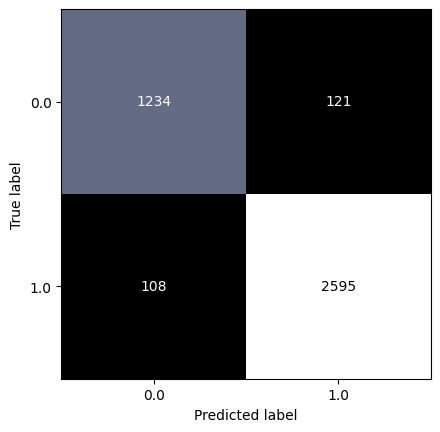

In [ ]:
eval_model(y_pred=y_pred_dt, y_test=y_test, model_name=model_name, features_id=features_id)

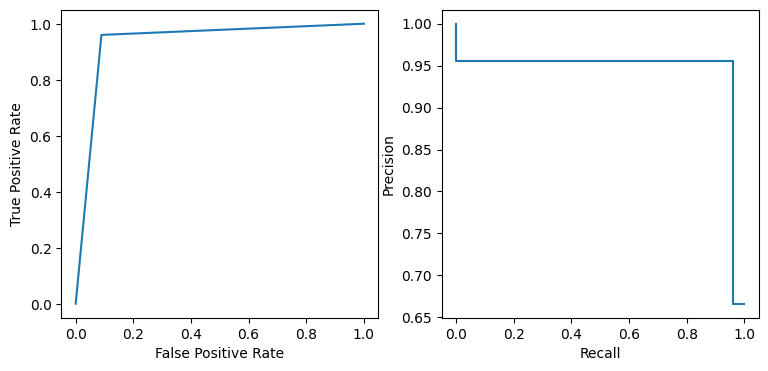

In [ ]:
model_curves(y_probs=y_prob_dt)

In [ ]:
# Store predictions
model_pred_dict_update(y_pred=y_pred_dt, y_probs=y_prob_dt,
                       model_name=model_name, features_id=features_id)
model_predictions

# Remove item from dict
# model_predictions.pop("Decision Tree: F2")


#### **Model 2: Gaussian Naive Bayes**

##### **Model Description**

**Naive Bayes Classifiers** are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In our Bayesian classification model, we're interested in finding the probability of label `havarth` given some observed features, which we can write as $P(\text{havarth}~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

<br>

$$
P(h~|~f) = \frac{P(f~|~h)P(h)}{P(f)}
$$

<br>

Where $f$ are our features, and $h$ is the class attribute `havarth` which in our dataset can be either:
1: Yes, the individual has been told they have arthritis.

> **Yes (1):** the individual has been told they have arthritis.
>
> **No (2):** the individual has not been told they have arthritis.

If we are trying to decide between our two labels then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

<br>

$$
\frac{P(Yes~|~f)}{P(No~|~f)} = \frac{P(f~|~Yes)}{P(f~|~No)}\frac{P(Yes)}{P(No)}
$$

<br>

All we need now is some model by which we can compute $P(f~|~h)$ for each label. For this we will use `sklearn.naive_bayes.GaussianNB()`.

The `sklearn.naive_bayes.GaussianNB()` algorithm uses:

<br>

$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$

<br>

to compute an estimation of $P(f~|~h)$, where $\sigma_y$ and $\mu_y$ are estimated using maximum likelihood.

##### **Build Model**

In [ ]:
model_name = "Gaussian NB"

# Build
gnb_model = GaussianNB()

# Fit
gnb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predict
y_pred_nb = gnb_model.predict(X_test); y_pred_nb

# Prediction Probabilities
y_prob_nb = gnb_model.predict_proba(X_test); y_prob_nb

array([[0.78206735, 0.21793265],
       [0.0919587 , 0.9080413 ],
       [0.9871433 , 0.0128567 ],
       ...,
       [0.004967  , 0.995033  ],
       [0.00795716, 0.99204284],
       [0.96721929, 0.03278071]])

##### **Evaluate Model**

Naive Bayes Score:  0.8735830458353869


,Model Name,Class,TPR,FPR,Precision,Recall,F1,ROC Area,MCC
1,Gaussian NB: F5,0,0.923,0.226,0.835,0.774,0.804,0.849,0.712
2,Gaussian NB: F5,1,0.774,0.077,0.891,0.923,0.907,0.849,0.712
3,Gaussian NB: F5,weighted,0.856,0.175,0.872,0.874,0.872,0.849,0.712


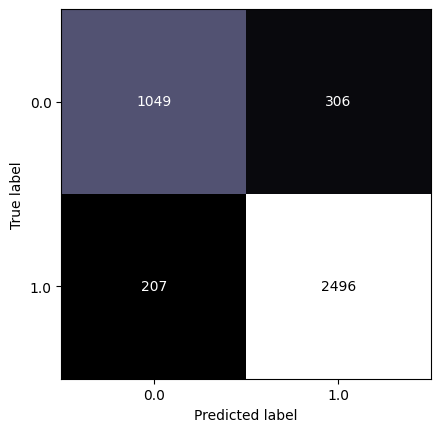

In [ ]:
# accuracy
print("Naive Bayes Score: ", gnb_model.score(X_test, y_test))

eval_model(y_pred=y_pred_nb, model_name=model_name, features_id=features_id)

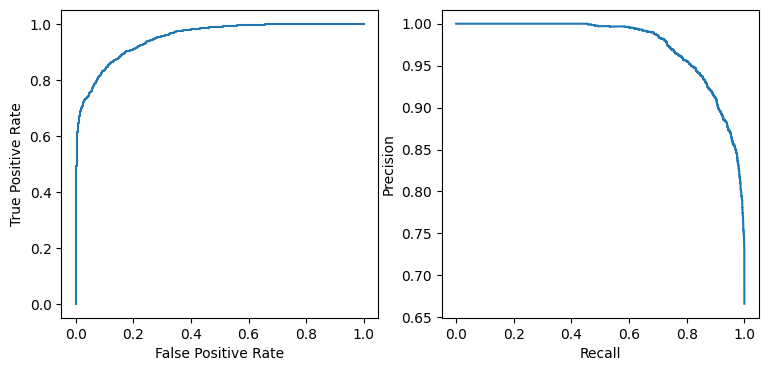

In [ ]:
model_curves(y_probs=y_prob_nb)

In [ ]:
# Store predictions
model_pred_dict_update(y_pred=y_pred_nb, y_probs=y_prob_nb,
                       model_name=model_name, features_id=features_id)

model_predictions

#### **Model 3: KNN**

##### Build Model

Text(0, 0.5, 'Accuracy Score')

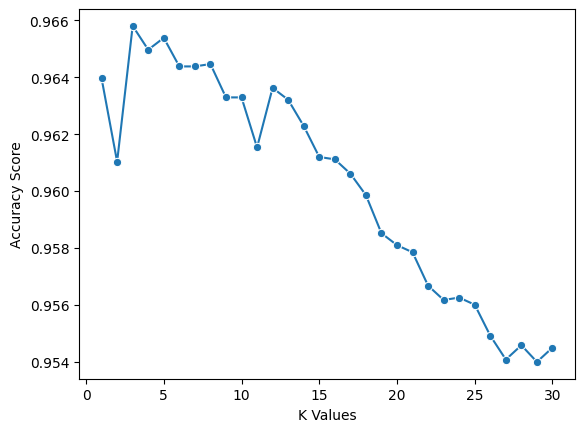

In [ ]:
model_name = "KNN"

# Finding ideal k
k_values = [i for i in range (1,31)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5) # doesn't test on the same train/test split each time, thats why you use X and y.
    scores.append(np.mean(score))
# cv = Determines the cross-validation splitting strategy.



sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
# Build Model
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
# predictions
y_pred_knn = knn.predict(X_test); y_pred_knn
# probabilities
y_prob_knn = knn.predict_proba(X_test); y_prob_knn

array([[1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ]])

##### Evaluate Model

KNN Model Accuracy: 0.9672252341054707


,Model Name,Class,TPR,FPR,Precision,Recall,F1,ROC Area,MCC
1,KNN: F5,0,0.953,0.026,0.949,0.953,0.951,0.964,0.926
2,KNN: F5,1,0.974,0.047,0.976,0.974,0.975,0.964,0.926
3,KNN: F5,weighted,0.968,0.04,0.967,0.967,0.967,0.964,0.926


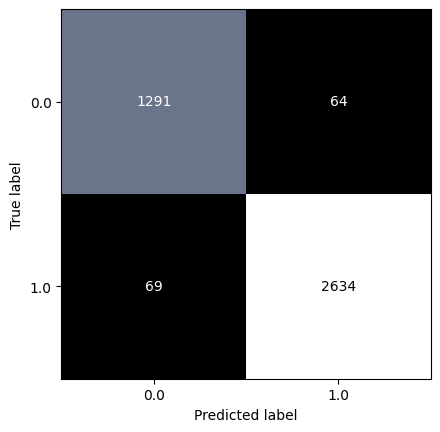

In [ ]:
accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Model Accuracy:", accuracy)

eval_model(y_pred=y_pred_knn, model_name=model_name, features_id=features_id)


In [ ]:
model_curves(y_probs=y_prob_knn)

NameError: ignored

In [ ]:
# Store predictions
model_pred_dict_update(y_pred=y_pred_knn, y_probs=y_prob_knn,
                       model_name=model_name, features_id=features_id)

model_predictions

#### **Model 4: Neural Network**

##### Sequential Neural Network

In [ ]:
# build model
model_name = "Sequential NN"

# parameters
n_features = len(X_train.columns)

# hyperparameters
hidden_units=100
learning_rate=0.01
hidden_layer_act='tanh'
output_layer_act='sigmoid'
n_epochs=100

# initialize model
model = Sequential()
# add layers to the model
model.add(Dense(hidden_units, input_dim=n_features, activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))
model.add(Dense(1, activation=output_layer_act))

# define model optimizer
sgd=optimizers.SGD(learning_rate=learning_rate)
# compile model
model.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['acc'])

In [ ]:
# fit model
model_nn = model.fit(X_train, y_train, epochs=n_epochs, batch_size=len(X_train),  verbose=2)

In [ ]:
# Positive Class Probability
y_prob_nn = model.predict(X_test)

# Outputs a probability, since binary. Round to get our class.
y_pred_nn = [int(round(x[0])) for x in y_prob_nn]

127/127 [==============================] - 0s 1ms/step


###### **Evaluate Model**

,Model Name,Class,TPR,FPR,Precision,Recall,F1,ROC Area,MCC
1,Sequential NN: F5,0,0.943,0.296,0.862,0.704,0.775,0.824,0.686
2,Sequential NN: F5,1,0.704,0.057,0.864,0.943,0.902,0.824,0.686
3,Sequential NN: F5,weighted,0.828,0.217,0.863,0.863,0.86,0.824,0.686


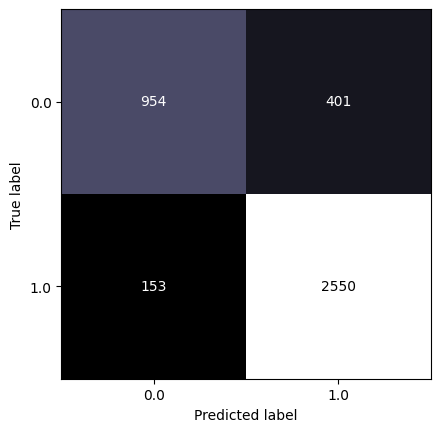

In [ ]:
eval_model(y_pred=y_pred_nn, model_name=model_name, features_id=features_id)

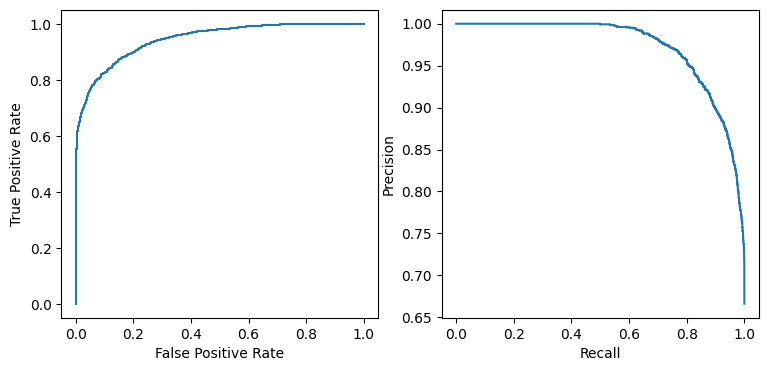

In [ ]:
model_curves(y_probs=y_prob_nn, model_type="NN")

In [ ]:
# Store predictions
model_pred_dict_update(y_pred=y_pred_nb, y_probs=y_prob_nb,
                       model_name=model_name, features_id=features_id)

model_predictions

The loss function used for binary classification problems is determined by the data format as well. When dealing with a single target vector of 0s and 1s, you should use BinaryCrossentropy as the loss function.

https://www.enthought.com/blog/neural-network-output-layer/

##### Regression Neural Network

In [ ]:
model_name = "MLP NN"

# build model
nn_mlp_model = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(25, 2),
              solver='lbfgs')

In [ ]:
# fit model
nn_mlp_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(25, 2), solver='lbfgs')

In [ ]:
# Positive Class Probabilities
y_pred_nn_mlp = nn_mlp_model.predict(X_test); y_pred_nn_mlp

# Prediction Probabilities
y_prob_nn_mlp = gnb_model.predict_proba(X_test); y_prob_nn_mlp

array([[0.78206735, 0.21793265],
       [0.0919587 , 0.9080413 ],
       [0.9871433 , 0.0128567 ],
       ...,
       [0.004967  , 0.995033  ],
       [0.00795716, 0.99204284],
       [0.96721929, 0.03278071]])

,Model Name,Class,TPR,FPR,Precision,Recall,F1,ROC Area,MCC
1,MLP NN: F5,0,0.982,0.055,0.964,0.945,0.955,0.964,0.932
2,MLP NN: F5,1,0.945,0.018,0.973,0.982,0.978,0.964,0.932
3,MLP NN: F5,weighted,0.964,0.042,0.97,0.97,0.97,0.964,0.932


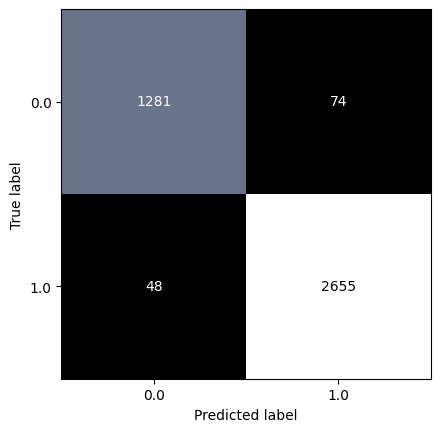

In [ ]:
eval_model(y_pred=y_pred_nn_mlp, model_name=model_name, features_id=features_id)

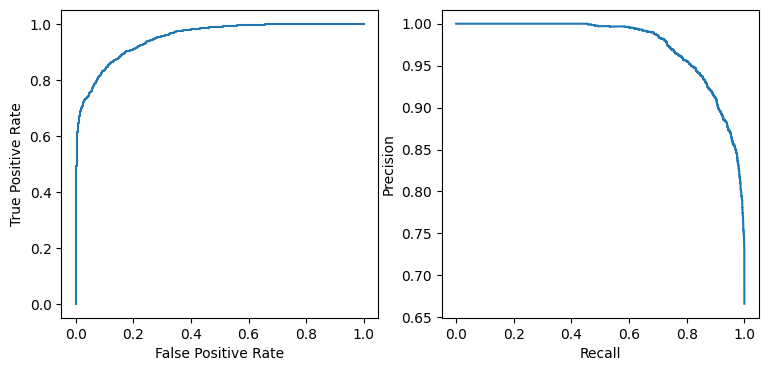

In [ ]:
model_curves(y_probs=y_prob_nn_mlp)

In [ ]:
# Store predictions
model_pred_dict_update(y_pred=y_pred_nn_mlp, y_probs=y_prob_nn_mlp,
                       model_name=model_name, features_id=features_id)

model_predictions

#### **Model 5: RandomForrest**

##### **Build Model**

In [ ]:
model_name = "Random Forest"
# define the model
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_features=None)
# RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,min_samples_split=2,
#                        min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
#                        max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1,
#                        random_state=None, verbose=0, warm_start=False,class_weight=None)

## None = checks all features each node.

# fit the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=None)

In [ ]:
# predictions
y_pred_rf = rf_model.predict(X_test)
# probabilities
y_prob_rf = rf_model.predict_proba(X_test); y_prob_rf

array([[1.  , 0.  ],
       [0.09, 0.91],
       [1.  , 0.  ],
       ...,
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ]])

##### **Evaluate Model**

,Model Name,Class,TPR,FPR,Precision,Recall,F1,ROC Area,MCC
1,Gaussian NB: F5,0,0.85,0.514,0.618,0.486,0.544,0.668,0.36
2,Gaussian NB: F5,1,0.486,0.15,0.767,0.85,0.806,0.668,0.36
3,Gaussian NB: F5,weighted,0.704,0.391,0.718,0.728,0.719,0.668,0.36


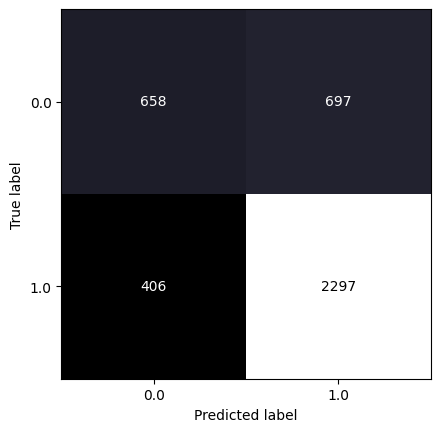

In [ ]:
eval_model(y_pred=y_pred_rf, model_name=model_name, features_id=features_id)

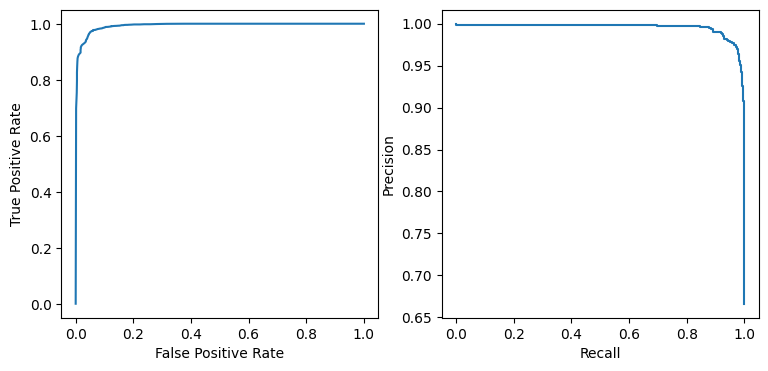

In [ ]:
model_curves(y_probs=y_prob_rf)

In [ ]:
# Store predictions
model_pred_dict_update(y_pred=y_pred_knn, y_probs=y_prob_knn,
                       model_name=model_name, features_id=features_id)

model_predictions

##### **Feature Importance**

In [ ]:
# using random forest for feature importance on a classification problem

# get importance
importance = rf_model.feature_importances_

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()




# Create a dataframe of feature importance

# # Feature Set 1 and 2
# feature_names = list(feature_info['rename'])
# feature_names.remove('havarth')

# Feature Set 3 and 4
# feature_names = list(df_combo4.columns) # 3
feature_names = top_10_gini_features # 4
feature_names.remove('havarth')


feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importance}); feature_importance
top_features = feature_importance.sort_values(by='importance', ascending=False)

top_features_10 = top_features.head(10); top_features_10
top_features

## **Functions**

#### ***Data Wrangling Functions***

##### Median, Mean, Mode Replace Function

In [ ]:
# Replaces ?, and all other blanks/no response/unknown answers with allocated metric (mean, median, mode)
# Had a lot of issues with typing. np.nan, str, floats, etc. working with a lot of different data types in same column.

def stat_replace(df):
  for col in df:
    if df[col].str.contains(('median')).any():
      median_col = df[col].dropna()[~df[col].isin(['median', 'nan'])].astype(float)
      median = round(stats.median(median_col))
      df[col] = df[col].replace(['median', 'nan'], median)
    elif df[col].str.contains('mean').any():
      mean_col = df[col].dropna()[~df[col].isin(['mean', 'nan'])].astype(float)
      mean = round(stats.mean(mean_col))
      df[col] = df[col].replace(['mean', 'nan'], mean)
    elif df[col].str.contains('mode').any():
      mode_col = df[col].dropna()[~df[col].isin(['mode', 'nan'])].astype(float)
      mode = round(stats.mode(mode_col))
      df[col] = df[col].replace(['mode', 'nan'], mode)

In [ ]:
# Check Function
# df_test = df[['children', 'edu', 'sex', 'height', 'income']]; df_test
# df_values(df_test)
# stat_replace(df_test)
# df_values(df_test)

# # Why getting a str and int? when i convert?
# df_test[df_test.sex == 2] # 175 row
# df_test[df_test.sex == '2'] # row 0

# df_values(df)
# df_test2 = df_test.astype('str'); df_test2.dtypes
# df_values(df_test2)
# # now it works.

# # Checking replace and fills
# col = 'children'
# df_before = df[col]
# # number of nan before. all get converted to median val.
# len(df.children[df.children.isna()])

# df_values(df.children)
# if df[col].str.contains('median').any():
#   df_values(df[col])
#   median_col = df[col].dropna()[~df[col].isin(['median', np.nan])].astype(float); median_col
#   median = round(stats.median(median_col)); median
#   # df[col] = df[col].replace(['median', np.nan], median)
#   df[col] = df[col].replace(['median', np.nan], median)
#   df_values(df[col])

##### Complex Find and Replace Function

In [ ]:
def df_find_replace(df, col, null_vals, replace, type):
# Goes through each column and finds null values and replaces them with: specific value, mode, median, strata.

  """
  df = dataframe
  col = column
  null_vals = list of null values in column you want to replace
  replace = value you want to replace null values with.
  Only applies if you use type = 'simple'. NA if using mode or strata.
  type = type of replacement.
    'simple' = simple find and replace.
    'mean' = find and replace with mean of the col.
    'median' = find and replace with median of the col.
    'mode' = find and replace with mode of the col.
    'strata' = find and replace with all variables of col, at proportions equal to the entire col.

  todo:
  check out df.replace() function, can input dictionary into it, which may be useful.
  """

  if type == 'simple':
    df_simple_find_replace(df, col, null_vals, replace)
  elif type == 'mean':
    replace = round(stats.mean(~df[col].isin(null_vals)))
    df_simple_find_replace(df, col, null_vals, replace)
  elif type == 'median':
    replace = round(stats.median(~df[col].isin(null_vals)))
    df_simple_find_replace(df, col, null_vals, replace)
  elif type == 'mode':
    replace = stats.mode(~df[col].isin(null_vals))
    df_simple_find_replace(df, col, null_vals, replace)
  elif type == 'strata':
    df_strata_replace(df, col, null_vals)
  else:
    print("Replace type unknown.")

In [ ]:
# # test function
# df_test = df_raw1[list(features_r1['rename'])]
# df_find_replace(df_test, 'age', [14], 'NA', 'median')


# stats.median(df_test['age'])

##### Simple Find and Replace Function

In [ ]:
# Create Function
# finds value x in df.col and changes to y.
# make sure same dtype

def df_simple_find_replace(df, col, null_vals, replace):
  print("DataFrame Column Before:")
  print(df[col].value_counts())

  index = df[df[col].isin(null_vals)].index
  df.loc[index, col] = replace

  print("DataFrame Column After:")
  print(df[col].value_counts())

In [ ]:
# # Test function
# df_2 = df_raw1[list(features_r1['rename'])]
# df_simple_find_replace(df_2, 'age', [1000], 14)

##### Stratified Replacement Function

In [ ]:
# Stratafied Filling of Blanks/Nulls/NA
# List null, blank values.
# Function will replace all with values from the feature in a ratio equal to the stratified feature.

def df_strata_replace(df, col, null_vals):

  # find indexes of null values
  index = df[df[col].isin(null_vals)].index; index
  # null values
  n_null = len(index)

  # find strata percentages
  # not including null values
  df_st = df[~df[col].isin(null_vals)]; df_st
  strata_per = df_st[col].value_counts()/sum(df_st[col].value_counts())
  strata_per
  strata_per.index

  # convert percentage to quantity of null values to assign to each variable in the population
  null_val_quant = np.rint(strata_per.values*n_null).astype('int'); null_val_quant

  # add any discrepancy to the most frequent variable in col
  sum_strata = sum(null_val_quant); sum_strata
  diff = n_null - sum_strata; diff

  # Create a dictionary of unique variables in column and the number of null values to replace with said variable.
  strata_dict = {strata_per.index[i]:null_val_quant[i] for i in range(0, len(strata_per))}; strata_dict
  strata_dict[stats.mode(df[col])] = strata_dict[stats.mode(df[col])] + diff
  # Check
  sum(strata_dict.values()) == n_null


  # Print statement check
  print("DataFrame Column Before:")
  print(df_values(df[col]))


  # randomize our indexes
  index_list = np.array(index)
  random.shuffle(index_list)
  index_list

  i = 0
  for key, value in strata_dict.items():
    n = i + strata_dict[key]
    # rows containing null values
    # print(df.loc[index[i:n], col])
    df.loc[index[i:n], col] = key
    # all null rows replaced
    # print(df.loc[index[i:n], col])
    i += strata_dict[key]

In [ ]:
# # Test function

# df_test = df_raw1[list(features_r1['rename'])]
# strata_replace(df_test, 'age', [14])

# df_test[df_test['age'] == 14]

##### DataFrame Value Count Function

In [ ]:
# Create function that shows value distribution for each column
def df_values(df):
    if isinstance(df, pd.DataFrame):
      for col in df.columns:
        print(df[col].value_counts())
    elif isinstance(df,pd.Series):
      print(df.value_counts())

#### ***Evaluation Functions***

##### Model Prediction Storage

In [ ]:
# model_predictions = {}
model_name = "default_model_name"
def model_pred_dict_update(y_pred, y_probs, model_name=model_name, features_id=features_id):

  identifier =  model_name + ": " + features_id; identifier

  model_dict = {identifier:
    {'Model Type': model_name, 'Features Used': features_id,
    'y_preds':	y_pred, 'y_probs':	y_probs}}

  # Master Dictionary for Model Prediction Storage
  model_predictions.update(model_dict)

##### Model Performance Metrics Function

In [ ]:
def eval_model(y_pred, y_test=y_test, model_name=model_name, features_id=features_id):

  identifier =  model_name + ": " + features_id; identifier

  cm = confusion_matrix(y_test, y_pred)

  # Confusion Matrix
  tn, fp, fn, tp = cm.ravel()
  tn, fp, fn, tp

  # TP rate
  # class = 1, positive
  tpr = tp/(tp+fn); tpr
  # class = 0, negative
  tnr = tn/(tn+fp)
  # weighted
  total = (tp+fp+tn+fp); total
  N = tn + fn
  P = tp + fp
  tpr_weighted = tnr*(N/total) + tpr*(P/total); tpr_weighted


  # FP rate
  # class = 1, positive
  fpr = fp/(fp+tn); fpr
  # class = 0, negative
  fnr = fn/(fn+tp); fnr
  # weighted
  fpr_weighted = fpr*(P/total) + fnr*(N/total); fpr_weighted



  # precision
  # gives precision in form [0 Class, 1 Class (pos_label)]
  precision = metrics.precision_score(y_test, y_pred, pos_label=1, average=None); precision
  # weighted average over both classes
  precision_weight = metrics.precision_score(y_test, y_pred, pos_label=1, average='weighted')


  # recall
  recall = metrics.recall_score(y_test, y_pred, pos_label=1, average=None)
  recall_weight = metrics.recall_score(y_test, y_pred, pos_label=1, average='weighted')


  # F-measure
  f1 = metrics.f1_score(y_test, y_pred, pos_label=1, average=None); f1
  f1_weight = metrics.f1_score(y_test, y_pred, pos_label=1, average='weighted')


  # ROC area
  # SHOULD THIS CHANGE? Don't think so since its a metric for both classes.
  roc_area = metrics.roc_auc_score(y_test, y_pred, average=None); roc_area
  roc_area_weight = metrics.roc_auc_score(y_test, y_pred, average='weighted'); roc_area_weight


  # MCC
  # Don't believe you can do a weighted average of this.
  mcc = matthews_corrcoef(y_test, y_pred)



  # Weighted average (over all classes) of each of the above performance measures.
  # PRC (imbalanced data set).
  precision_recall_curve(y_test, y_pred)

  eval_dict = {"1": {'Model Name': identifier, 'Class': 0,
                    'TPR':	round(tnr, 3), 'FPR':	round(fnr, 3),
                    'Precision':	round(precision[0], 3), 'Recall':	round(recall[0], 3),
                    'F1':	round(f1[0], 3), 'ROC Area':	round(roc_area, 3),
                    'MCC': round(mcc, 3)},
              "2": {'Model Name': identifier, 'Class': 1,
                    'TPR':	round(tpr, 3), 'FPR':	round(fpr, 3),
                    'Precision':	round(precision[1], 3), 'Recall':	round(recall[1], 3),
                    'F1':	round(f1[1], 3), 'ROC Area':	round(roc_area, 3),
                    'MCC': round(mcc, 3)},
              "3": {'Model Name': identifier, 'Class': 'weighted',
                    'TPR':	round(tpr_weighted, 3), 'FPR':	round(fpr_weighted, 3),
                    'Precision':	round(precision_weight, 3), 'Recall':	round(recall_weight, 3),
                    'F1':	round(f1_weight, 3), 'ROC Area':	round(roc_area, 3),
                    'MCC': round(mcc, 3)}
  }

  df_eval = pd.DataFrame(eval_dict).transpose()

  # Build cm graph
  disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='bone', colorbar=False)

  return df_eval

##### ROC and PRC Constructer

In [ ]:
def model_curves(y_probs, y_test=y_test, model_type="NA"):

  if model_type == "NN":
    # get positive class probabilities
    pos_probs = y_probs
  else:
    pos_probs = pd.DataFrame(y_probs)[1]

  # ROC
  fpr, tpr, _ = roc_curve(y_test, pos_probs, pos_label=1)
  roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr) #.plot()

  # PRC
  prec, recall, _ = precision_recall_curve(y_test, pos_probs, pos_label=1)
  pr_display = PrecisionRecallDisplay(precision=prec, recall=recall) # .plot()

  # Plot
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

  roc_display.plot(ax=ax1)
  pr_display.plot(ax=ax2)
  plt.show()

##### ***ROC and PRC Multiple Model Overlay***

In [ ]:
# Multiple Curves

#set up plotting area
plt.figure(0).clf()


pos_prob_dt = pd.DataFrame(y_prob_dt)[1]
pos_prob_nb = pd.DataFrame(y_prob_nb)[1]

# ROC 1
fpr, tpr, _ = metrics.roc_curve(y_test, pos_prob_dt, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, pos_prob_dt), 4)
plt.plot(fpr,tpr,label= model_name+", AUC="+str(auc))

# ROC 2
fpr, tpr, _ = metrics.roc_curve(y_test, pos_prob_nb, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, pos_prob_nb), 4)
plt.plot(fpr,tpr,label= model_name+", AUC="+str(auc))


#add legend
plt.legend()

NameError: ignored

<Figure size 640x480 with 0 Axes>